<a href="https://colab.research.google.com/github/nikkkkhil/helmet-mask-detection/blob/master/tfobjdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#/content/drive/My Drive/object_detection

In [0]:
%tensorflow_version 1.x
!pip uninstall tensorflow-gpu && pip install tensorflow-gpu==1.15.0
import tensorflow as tf
print(tf.__version__)
!pip install numpy==1.17.4


Streaming output truncated to the last 5000 lines.
    /usr/local/lib/python3.6/dist-packages/tensorflow/include/external/com_github_grpc_grpc/include/grpc/grpc_security.h
    /usr/local/lib/python3.6/dist-packages/tensorflow/include/external/com_github_grpc_grpc/include/grpc/grpc_security_constants.h
    /usr/local/lib/python3.6/dist-packages/tensorflow/include/external/com_github_grpc_grpc/include/grpc/impl/codegen/atm.h
    /usr/local/lib/python3.6/dist-packages/tensorflow/include/external/com_github_grpc_grpc/include/grpc/impl/codegen/atm_gcc_atomic.h
    /usr/local/lib/python3.6/dist-packages/tensorflow/include/external/com_github_grpc_grpc/include/grpc/impl/codegen/atm_gcc_sync.h
    /usr/local/lib/python3.6/dist-packages/tensorflow/include/external/com_github_grpc_grpc/include/grpc/impl/codegen/atm_windows.h
    /usr/local/lib/python3.6/dist-packages/tensorflow/include/external/com_github_grpc_grpc/include/grpc/impl/codegen/byte_buffer.h
    /usr/local/lib/python3.6/dist-package

KeyboardInterrupt: ignored

In [0]:
import tensorflow as tf
print(tf.__version__)

1.15.2


In [0]:
import os

In [0]:
os.chdir('/content/drive/My Drive/object_detection/models/research')

In [0]:
os.getcwd()

'/content/drive/My Drive/object_detection/models/research'

In [0]:
!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk
!pip install -qq Cython contextlib2 pillow lxml matplotlib pycocotools

In [0]:
from __future__ import division, print_function, absolute_import

import pandas as pd
import numpy as np
import csv

import re
import os
import io
import glob
import shutil
import urllib.request
import tarfile
import xml.etree.ElementTree as ET

import tensorflow.compat.v1 as tf
import cv2 

from PIL import Image
from collections import namedtuple, OrderedDict

from google.colab import files

In [0]:
print(tf.__version__)

1.15.2


In [0]:
#adjusted from: https://github.com/datitran/raccoon_dataset
# def xml_to_csv(path):
#   classes_names = []
#   xml_list = []

#   for xml_file in glob.glob(path + '/*.xml'):
#     tree = ET.parse(xml_file)
#     root = tree.getroot()
#     for member in root.findall('object'):
#       classes_names.append(member[0].text)
#       value = (root.find('filename').text ,
#                int(root.find('size')[0].text),
#                int(root.find('size')[1].text),
#                member[0].text,
#                float(member[4][0].text),
#                float(member[4][1].text),
#                float(member[4][2].text),
#                float(member[4][3].text))
#       xml_list.append(value)
#   column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
#   xml_df = pd.DataFrame(xml_list, columns=column_name) 
#   classes_names = list(set(classes_names))
#   classes_names.sort()
#   return xml_df, classes_names

# for label_path in ['train_labels', 'test_labels']:
#   image_path = os.path.join(os.getcwd(), label_path)
#   xml_df, classes = xml_to_csv(label_path)
#   xml_df.to_csv(f'{label_path}.csv', index=None)
#   print(f'Successfully converted {label_path} xml to csv.')

# label_map_path = os.path.join("label_map.pbtxt")
# pbtxt_content = ""

# for i, class_name in enumerate(classes):
#     pbtxt_content = (
#         pbtxt_content
#         + "item {{\n    id: {0}\n    name: '{1}'\n}}\n\n".format(i + 1, class_name)
#     )
# pbtxt_content = pbtxt_content.strip()
# with open(label_map_path, "w") as f:
#     f.write(pbtxt_content)

In [0]:
# downloads the models
# !git clone --q https://github.com/tensorflow/models.git

In [0]:
# compils the proto buffers
os.chdir('/content/drive/My Drive/object_detection/models/research')
!protoc object_detection/protos/*.proto --python_out=.
# exports PYTHONPATH environment var with research and slim paths
os.environ['PYTHONPATH'] += ':./:./slim/'

object_detection/protos/input_reader.proto: warning: Import object_detection/protos/image_resizer.proto but not used.


In [0]:
#adjusted from: https://github.com/datitran/raccoon_dataset

# converts the csv files for training and testing data to two TFRecords files.
# places the output in the same directory as the input


# from object_detection.utils import dataset_util



#change this to the base directory where your data/ is 
# DATA_BASE_PATH = '/content/drive/My Drive/object_detection/data/'

#location of images
# image_dir = DATA_BASE_PATH +'images/'

# def class_text_to_int(row_label):
#   if row_label == 'Helmet Mask':
#     return 1
#   elif row_label ==  'No Helmet!! Mask':
#     return 2
#   elif row_label == 'Helmet No Mask!!':
#     return 3
#   elif row_label ==  'No Helmet!! No Mask!!':
#     return 4
#   else:
#     None


# def split(df, group):
# 		data = namedtuple('data', ['filename', 'object'])
# 		gb = df.groupby(group)
# 		return [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.groups)]

# def create_tf_example(group, path):
# 		with tf.io.gfile.GFile(os.path.join(path, '{}'.format(group.filename)), 'rb') as fid:
# 				encoded_jpg = fid.read()
# 		encoded_jpg_io = io.BytesIO(encoded_jpg)
# 		image = Image.open(encoded_jpg_io)
# 		width, height = image.size

# 		filename = group.filename.encode('utf8')
# 		image_format = b'jpg'
# 		xmins = []
# 		xmaxs = []
# 		ymins = []
# 		ymaxs = []
# 		classes_text = []
# 		classes = []

# 		for index, row in group.object.iterrows():
# 				xmins.append(row['xmin'] / width)
# 				xmaxs.append(row['xmax'] / width)
# 				ymins.append(row['ymin'] / height)
# 				ymaxs.append(row['ymax'] / height)
# 				classes_text.append(row['class'].encode('utf8'))
# 				classes.append(class_text_to_int(row['class']))

# 		tf_example = tf.train.Example(features=tf.train.Features(feature={
# 				'image/height': dataset_util.int64_feature(height),
# 				'image/width': dataset_util.int64_feature(width),
# 				'image/filename': dataset_util.bytes_feature(filename),
# 				'image/source_id': dataset_util.bytes_feature(filename),
# 				'image/encoded': dataset_util.bytes_feature(encoded_jpg),
# 				'image/format': dataset_util.bytes_feature(image_format),
# 				'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
# 				'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
# 				'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
# 				'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
# 				'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
# 				'image/object/class/label': dataset_util.int64_list_feature(classes),
# 		}))
# 		return tf_example

# for csv in ['train_labels', 'test_labels']:
#   writer = tf.io.TFRecordWriter(DATA_BASE_PATH + csv + '.record')
#   path = os.path.join(image_dir)
#   examples = pd.read_csv(DATA_BASE_PATH + csv + '.csv')
#   grouped = split(examples, 'filename')
#   for group in grouped:
#       tf_example = create_tf_example(group, path)
#       writer.write(tf_example.SerializeToString())
    
#   writer.close()
#   output_path = os.path.join(os.getcwd(), DATA_BASE_PATH + csv + '.record')
#   print('Successfully created the TFRecords: {}'.format(DATA_BASE_PATH +csv + '.record'))


In [0]:
# %pycat /content/drive/My Drive/object_detection/data/train_labels.csv

In [0]:
# Some models to train on
# MODELS_CONFIG = {
#     'ssd_mobilenet_v2': {
#         'model_name': 'ssd_mobilenet_v2_coco_2018_03_29',
#     },
#     'faster_rcnn_inception_v2': {
#         'model_name': 'faster_rcnn_inception_v2_coco_2018_01_28',
#     },
# }

# Select a model from `MODELS_CONFIG`.
# I chose ssd_mobilenet_v2 for this project, you could choose any
# selected_model = 'ssd_mobilenet_v2'

In [0]:
#the distination folder where the model will be saved
#change this if you have a different working dir
# DEST_DIR = '/content/drive/My Drive/object_detection/models/research/pretrained_model'

# Name of the object detection model to use.
# MODEL = MODELS_CONFIG[selected_model]['model_name']

#selecting the model
# MODEL_FILE = MODEL + '.tar.gz'

#creating the downlaod link for the model selected
# DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

#checks if the model has already been downloaded, download it otherwise
# if not (os.path.exists(MODEL_FILE)):
    # urllib.request.urlretrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)

#unzipping the model and extracting its content
# tar = tarfile.open(MODEL_FILE)
# tar.extractall()
# tar.close()

# creating an output file to save the model while training
# os.remove(MODEL_FILE)
# if (os.path.exists(DEST_DIR)):
    # shutil.rmtree(DEST_DIR)
# os.rename(MODEL, DEST_DIR)

In [0]:
#path to the config file
# %pycat object_detection/samples/configs/ssd_mobilenet_v2_coco.config

In [0]:
#path to the config file
# %%writefile object_detection/samples/configs/ssd_mobilenet_v2_coco.config
# SSD with Mobilenet v2 configuration for MSCOCO Dataset.
# Users should configure the fine_tune_checkpoint field in the train config as
# well as the label_map_path and input_path fields in the train_input_reader and
# eval_input_reader. Search for "PATH_TO_BE_CONFIGURED" to find the fields that
# should be configured.

# model {
#   ssd {
#     num_classes: 4
#     box_coder {
#       faster_rcnn_box_coder {
#         y_scale: 10.0
#         x_scale: 10.0
#         height_scale: 5.0
#         width_scale: 5.0
#       }
#     }
#     matcher {
#       argmax_matcher {
#         matched_threshold: 0.5
#         unmatched_threshold: 0.5
#         ignore_thresholds: false
#         negatives_lower_than_unmatched: true
#         force_match_for_each_row: true
#       }
#     }
#     similarity_calculator {
#       iou_similarity {
#       }
#     }
#     anchor_generator {
#       ssd_anchor_generator {
#         num_layers: 6
#         min_scale: 0.2
#         max_scale: 0.95
#         aspect_ratios: 1.0
#         aspect_ratios: 2.0
#         aspect_ratios: 0.5
#         aspect_ratios: 3.0
#         aspect_ratios: 0.3333
#       }
#     }
#     image_resizer {
#       fixed_shape_resizer {
#         height: 300
#         width: 300
#       }
#     }
#     box_predictor {
#       convolutional_box_predictor {
#         min_depth: 0
#         max_depth: 0
#         num_layers_before_predictor: 0
#         use_dropout: True
#         dropout_keep_probability: 0.8
#         kernel_size: 1
#         box_code_size: 4
#         apply_sigmoid_to_scores: false
#         conv_hyperparams {
#           activation: RELU_6,
#           regularizer {
#             l2_regularizer {
#               weight: 0.00004
#             }
#           }
#           initializer {
#             truncated_normal_initializer {
#               stddev: 0.03
#               mean: 0.0
#             }
#           }
#           batch_norm {
#             train: true,
#             scale: true,
#             center: true,
#             decay: 0.9997,
#             epsilon: 0.001,
#           }
#         }
#       }
#     }
#     feature_extractor {
#       type: 'ssd_mobilenet_v2'
#       min_depth: 16
#       depth_multiplier: 1.0
#       conv_hyperparams {
#         activation: RELU_6,
#         regularizer {
#           l2_regularizer {
#             weight: 0.00004
#           }
#         }
#         initializer {
#           truncated_normal_initializer {
#             stddev: 0.03
#             mean: 0.0
#           }
#         }
#         batch_norm {
#           train: true,
#           scale: true,
#           center: true,
#           decay: 0.9997,
#           epsilon: 0.001,
#         }
#       }
#     }
#     loss {
#       classification_loss {
#         weighted_sigmoid {
#         }
#       }
#       localization_loss {
#         weighted_smooth_l1 {
#         }
#       }
#       hard_example_miner {
#         num_hard_examples: 3000
#         iou_threshold: 0.99
#         loss_type: CLASSIFICATION
#         max_negatives_per_positive: 3
#         min_negatives_per_image: 3
#       }
#       classification_weight: 1.0
#       localization_weight: 1.0
#     }
#     normalize_loss_by_num_matches: true
#     post_processing {
#       batch_non_max_suppression {
#         score_threshold: 1e-8
#         iou_threshold: 0.6
#         max_detections_per_class: 100
#         max_total_detections: 100
#       }
#       score_converter: SIGMOID
#     }
#   }
# }

# train_config: {
#   batch_size: 24
#   optimizer {
#     rms_prop_optimizer: {
#       learning_rate: {
#         exponential_decay_learning_rate {
#           initial_learning_rate: 0.004
#           decay_steps: 800720
#           decay_factor: 0.95
#         }
#       }
#       momentum_optimizer_value: 0.9
#       decay: 0.9
#       epsilon: 1.0
#     }
#   }
#   fine_tune_checkpoint: "/content/drive/My Drive/object_detection/models/research/pretrained_model/model.ckpt"
#   fine_tune_checkpoint_type:  "detection"
#   # Note: The below line limits the training process to 200K steps, which we
#   # empirically found to be sufficient enough to train the pets dataset. This
#   # effectively bypasses the learning rate schedule (the learning rate will
#   # never decay). Remove the below line to train indefinitely.
#   num_steps: 200000
#   data_augmentation_options {
#     random_horizontal_flip {
#     }
#   }
#   data_augmentation_options {
#     ssd_random_crop {
#     }
#   }
#   data_augmentation_options {
#     random_adjust_contrast {
#     }
#   }
#   data_augmentation_options {
#     random_rgb_to_gray {
#     }
#   }
#   data_augmentation_options {
#      random_vertical_flip {
#     }
#   }
#   data_augmentation_options {
#     random_rotation90 {
#     }
#   }
#   data_augmentation_options {
#     random_patch_gaussian {
#     }
#   }
# }

# train_input_reader: {
#   tf_record_input_reader {
#     input_path: "/content/drive/My Drive/object_detection/data/train_labels.record"
#   }
#   label_map_path: "/content/drive/My Drive/object_detection/data/label_map.pbtxt"
# }

# eval_config: {
#   num_examples: 100
#   # Note: The below line limits the evaluation process to 10 evaluations.
#   # Remove the below line to evaluate indefinitely.
#   # max_evals: 10
#   num_visualizations: 10
# }

# eval_input_reader: {
#   tf_record_input_reader {
#     input_path: "/content/drive/My Drive/object_detection/data/test_labels.record"
#   }
#   label_map_path: "/content/drive/My Drive/object_detection/data/label_map.pbtxt"
#   shuffle: false
#   num_readers: 1
# }

In [0]:
# !wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -o ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
#the logs that are created while training 
LOG_DIR = "training/"
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)
get_ipython().system_raw('./ngrok http 6006 &')
#The link to tensorboard.
#works after the training starts.
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://39e9fefc.ngrok.io


In [0]:
# !python object_detection/model_main.py \
#     --pipeline_config_path=/content/drive/My\ Drive/object_detection/models/research/object_detection/samples/configs/ssd_mobilenet_v2_coco.config \
#     --model_dir=training/

In [0]:

# # by Chengwei
# #dir where the model will be saved
# output_directory = './fine_tuned_model'

# lst = os.listdir('training')
# lst = [l for l in lst if 'model.ckpt-' in l and '.meta' in l]
# steps=np.array([int(re.findall('\d+', l)[0]) for l in lst])
# last_model = lst[steps.argmax()].replace('.meta', '')

# last_model_path = os.path.join('training', last_model)

In [0]:
!pwd

/content/drive/My Drive/object_detection/models/research


In [0]:
# # /content/drive/My Drive/object_detection
# !python ./object_detection/export_inference_graph.py \
#     --input_type=image_tensor \
#     --pipeline_config_path=./object_detection/samples/configs/ssd_mobilenet_v2_coco.config \
#     --output_directory={output_directory} \
#     --trained_checkpoint_prefix={last_model_path}

In [0]:
# from google.colab import files
# output_directory = './pretrained_model'
# files.download(output_directory + '/frozen_inference_graph.pb')


In [0]:
os.chdir('/content/drive/My Drive/object_detection/models/research/object_detection')

In [0]:
os.getcwd()

'/content/drive/My Drive/object_detection/models/research/object_detection'

In [0]:
%matplotlib inline

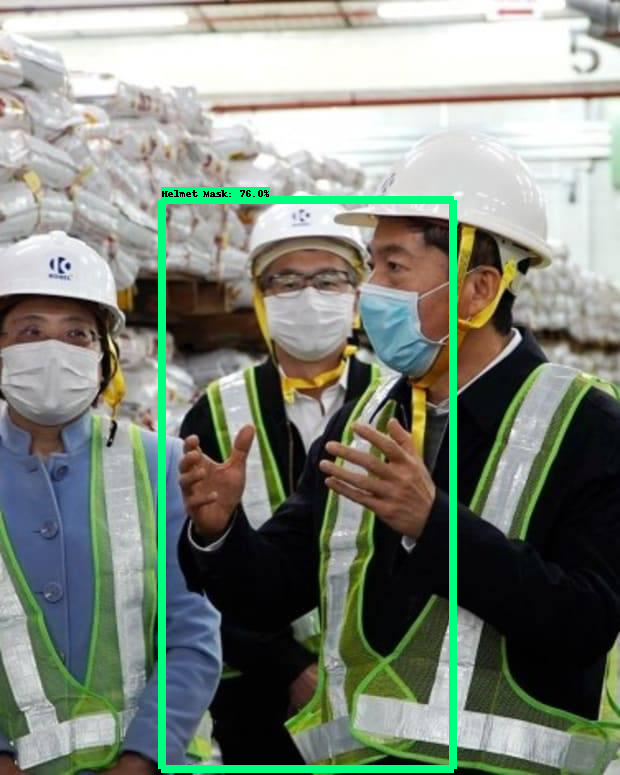

In [0]:
######## Image Object Detection Using Tensorflow-trained Classifier #########
#
# Author: Evan Juras
# Date: 1/15/18
# Description: 
# This program uses a TensorFlow-trained neural network to perform object detection.
# It loads the classifier and uses it to perform object detection on an image.
# It draws boxes, scores, and labels around the objects of interest in the image.

## Some of the code is copied from Google's example at
## https://github.com/tensorflow/models/blob/master/research/object_detection/object_detection_tutorial.ipynb

## and some is copied from Dat Tran's example at
## https://github.com/datitran/object_detector_app/blob/master/object_detection_app.py

## but I changed it to make it more understandable to me.

# Import packages
from google.colab.patches import cv2_imshow
import os
import cv2
import numpy as np
import tensorflow as tf
import sys

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")

# Import utilites
from utils import label_map_util
from utils import visualization_utils as vis_util

# Name of the directory containing the object detection module we're using
MODEL_NAME = 'inference_graph'
IMAGE_NAME = 'test1.jpg'

# Grab path to current working directory
CWD_PATH = os.getcwd()

# Path to frozen detection graph .pb file, which contains the model that is used
# for object detection.
PATH_TO_CKPT = '../pretrained_model/frozen_inference_graph.pb'

# Path to label map file
PATH_TO_LABELS = '../../../data/label_map.pbtxt'

# Path to image
PATH_TO_IMAGE = './test_images/45.jpg'

# Number of classes the object detector can identify
NUM_CLASSES = 4

# Load the label map.
# Label maps map indices to category names, so that when our convolution
# network predicts `5`, we know that this corresponds to `king`.
# Here we use internal utility functions, but anything that returns a
# dictionary mapping integers to appropriate string labels would be fine
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

# Load the Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

    sess = tf.Session(graph=detection_graph)

# Define input and output tensors (i.e. data) for the object detection classifier

# Input tensor is the image
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

# Output tensors are the detection boxes, scores, and classes
# Each box represents a part of the image where a particular object was detected
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

# Each score represents level of confidence for each of the objects.
# The score is shown on the result image, together with the class label.
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')

# Number of objects detected
num_detections = detection_graph.get_tensor_by_name('num_detections:0')

# Load image using OpenCV and
# expand image dimensions to have shape: [1, None, None, 3]
# i.e. a single-column array, where each item in the column has the pixel RGB value
image = cv2.imread(PATH_TO_IMAGE)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# Perform the actual detection by running the model with the image as input
(boxes, scores, classes, num) = sess.run(
    [detection_boxes, detection_scores, detection_classes, num_detections],
    feed_dict={image_tensor: image_expanded})

# Draw the results of the detection (aka 'visulaize the results')

vis_util.visualize_boxes_and_labels_on_image_array(
    image,
    np.squeeze(boxes),
    np.squeeze(classes).astype(np.int32),
    np.squeeze(scores),
    category_index,
    use_normalized_coordinates=True,
    line_thickness=8,
    min_score_thresh=0.60)

# All the results have been drawn on image. Now display the image.
cv2_imshow( image)



In [0]:
os.getcwd()

'/content/drive/My Drive/object_detection/models/research/object_detection'

In [0]:
# !unzip ../../../video.zip -d ./test_images/.

Archive:  ../../../video.zip
replace ./test_images/./out.mp4? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./test_images/./out.mp4  


In [0]:
PATH_TO_VIDEO = './test_images/out.mp4'
# Open video file
video = cv2.VideoCapture(PATH_TO_VIDEO)

while(video.isOpened()):

    # Acquire frame and expand frame dimensions to have shape: [1, None, None, 3]
    # i.e. a single-column array, where each item in the column has the pixel RGB value
    ret, frame = video.read()
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame_expanded = np.expand_dims(frame_rgb, axis=0)

    # Perform the actual detection by running the model with the image as input
    (boxes, scores, classes, num) = sess.run(
        [detection_boxes, detection_scores, detection_classes, num_detections],
        feed_dict={image_tensor: frame_expanded})

    # Draw the results of the detection (aka 'visulaize the results')
    vis_util.visualize_boxes_and_labels_on_image_array(
        frame,
        np.squeeze(boxes),
        np.squeeze(classes).astype(np.int32),
        np.squeeze(scores),
        category_index,
        use_normalized_coordinates=True,
        line_thickness=8,
        min_score_thresh=0.60)

    # All the results have been drawn on the frame, so it's time to display it.
    cv2_imshow(frame)

    # Press 'q' to quit
    if cv2.waitKey(1) == ord('q'):
        break